In [5]:
import sqlite3
import shapely 
import geopandas as gpd
import matplotlib.pyplot as plt
import fiona
import shapely.wkb as swkb

In [6]:
dll = r"D:\Python\stgeometry_sqlite.dll"

In [8]:
conn = sqlite3.connect(r'D:\Python\testspatial.sqlite')

In [9]:
conn.enable_load_extension(True)

In [10]:
conn.execute("SELECT load_extension('stgeometry_sqlite.dll','SDE_SQL_funcs_init');")

In [11]:
conn.execute("select CreateOGCTables()")

In [12]:
# creating a POINT table
sql = 'CREATE TABLE if not exists test_pt ('
sql += 'id INTEGER NOT NULL PRIMARY KEY,'
sql += 'name TEXT NOT NULL)'
conn.execute(sql)
conn.commit()

In [13]:
conn.execute("SELECT AddGeometryColumn(null,'test_pt', 'the_geom',  4326, 'point', 'XY', 'null');")

In [14]:
a=conn.execute("select name, st_asbinary(the_geom) from 'test_pt';")

In [15]:
b = a.fetchall()

In [14]:
conn.execute("INSERT INTO test_pt (the_geom, name) VALUES (st_geometry ('point (1 2)',4326), 'name')")

In [15]:
import fiona
import shapely.wkb as swkb

In [17]:
df = gpd.read_postgis("SELECT ST_AsBinary(the_geom) AS geom, name FROM test_pt", conn)

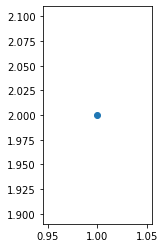

In [18]:
df.plot()